In [1]:
%pylab inline
from sklearn import tree
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [4]:
len(iris.data)

150

In [5]:
clf = tree.DecisionTreeClassifier()

In [6]:
clf = clf.fit(iris.data,iris.target)

In [7]:
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

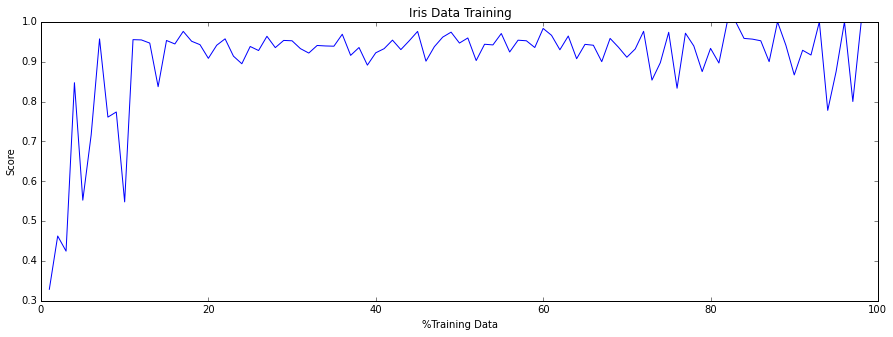

In [8]:
n_samples=len(iris.data)
x=iris.data
y=iris.target
scores=[]
divisions=np.array(range(1,100), dtype=float)/100

for n in divisions:
    #Create random indices
    sample_index=random.sample(range(len(x)),int(len(x)*n))
    valid_index=[i for i in range(len(x)) if i not in sample_index]

    #Sample and validation images
    sample_data=[x[i] for i in sample_index]
    valid_data=[x[i] for i in valid_index]

    #Sample and validation targets
    sample_target=[y[i] for i in sample_index]
    valid_target=[y[i] for i in valid_index]

    #Using the Random Tree Classifier
    classifier = tree.DecisionTreeClassifier()

    #Fit model with sample data
    classifier.fit(sample_data, sample_target)

    #Attempt to predict validation data
    score=classifier.score(valid_data, valid_target)
    scores.append(score)
    
plt.figure(figsize=(15,5))
plt.plot(divisions*100, scores)
plt.xlabel(r'%Training Data')
plt.ylabel('Score')
plt.title('Iris Data Training')